In [4]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Symbolic Case

You know the formula explicitly but don't really feel like using a pencil to take the derivative

$$f(x) = ... $$

**Example:** $$f(x) = e^{-a\sin(x^2)}\cdot \sin(b^x) \cdot \ln(c\sin^2(x)/x)$$

First Define all your symbols in sympy

In [5]:
x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.symbols('f', cls=smp.Function)
f = f(x)

In [6]:
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(c*smp.sin(x)**2/x)
f

exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)

Compute derivatives using `smp.diff(f, x)` where $f$ is the function you want to take the derivative of and $x$ is the variable you are taking the derivative with respect to.

In [7]:
dfdx = smp.diff(f, x)
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

Can take the nth derivative $d^n f/dx^n$ by putting the optional argument at the end `smp.diff(f,x,n)`.

In [8]:
d4fdx4 = smp.diff(f, x, 4)
d4fdx4

(24*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(2*cos(x) - sin(x)/x)*log(b)**2*cos(x**2)/sin(x) + 8*a*b**x*x*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*log(c*sin(x)**2/x)*cos(x**2) + 24*a*b**x*x*(2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*log(b)*cos(b**x)*cos(x**2)/sin(x) + 16*a*b**x*x*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) - 12*a*b**x*(b**x*sin(b**x) - cos(b**x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)**2*log(c*sin(x)**2/x) + 24*a*b**x*(2*cos(x) - sin(x)/x)*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)*cos(b**x)/sin(x) + 16*a*x*(2*cos(x) - sin(x)/x)*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*sin(b**x)/sin(x) + 16*a*x*(-3*(2*cos(x) - sin(x)/x)*cos(x)**2/sin(x)**2 - 4*(s

Can then compute numerical values by plugging in numbers

In [9]:
d4fdx4.subs([(x, 4), (a, 1), (b, 2), (c, 3)]).evalf()

-73035.8044625845

Can also convert to a numerical function for plotting

In [10]:
dfdx_num = smp.lambdify([x, a, b, c], dfdx)
d4fdx4_num = smp.lambdify([x, a, b, c], d4fdx4)

Define $x$ and $y$ arrays using the numerical function above

Plot

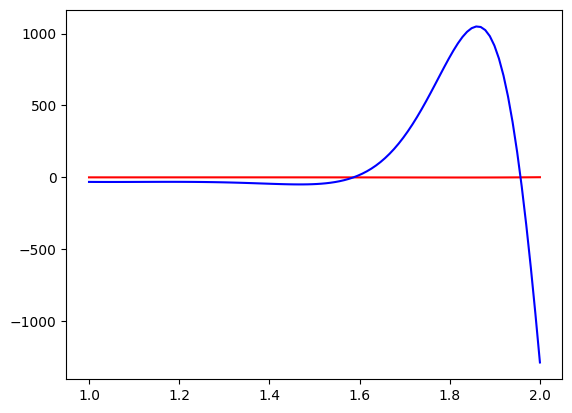

In [11]:
x = np.linspace(1, 2, 100)
plt.plot(x, dfdx_num(x, 1, 2, 3), 'r')
plt.plot(x, d4fdx4_num(x, 1, 2, 3), 'b')

# Numerical Case

Your given data like such

In [12]:
x, y = np.loadtxt('sample_data1.txt')

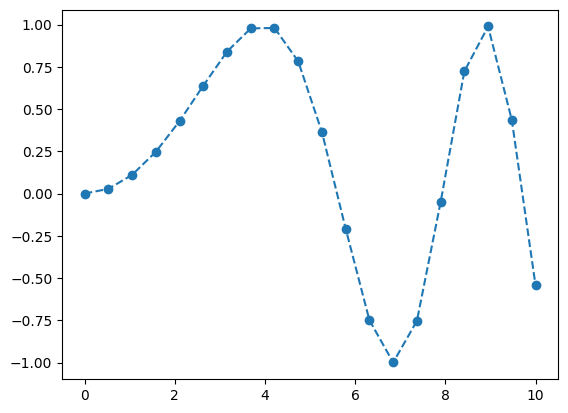

In [13]:
plt.plot(x, y, 'o--')

There are a few ways to go about this.

**1: The basic way**

In [14]:
dydx = np.gradient(y, x)

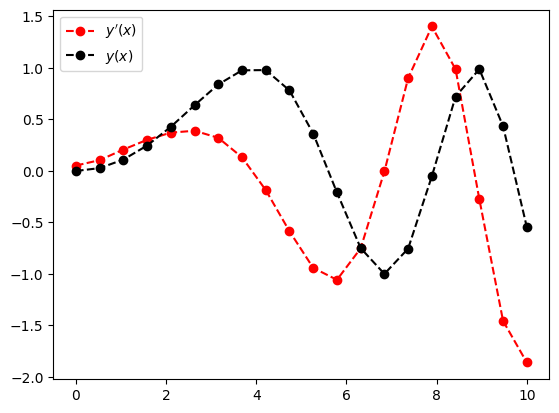

In [15]:
plt.plot(x, dydx, 'ro--', label='$y\'(x)$')
plt.plot(x, y, 'ko--', label='$y(x)$')
plt.legend()

This way works fine if the data is smooth but not if the data is noisy:

In [16]:
x, y = np.loadtxt('sample_data2.txt')
dydx = np.gradient(y, x)

Plot the noisey data

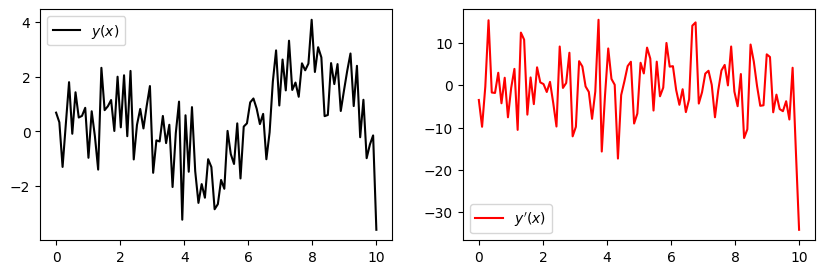

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,3)) 
ax[1].plot(x, dydx, 'r-', label='$y\'(x)$')
ax[0].plot(x, y, 'k-', label='$y(x)$')
[a.legend() for a in ax]

Noise gets amplified in the derivative! This leads us to technique 2:

**2. The Clever Way**

Smooth data then take derivative. Consider the following new covid cases per day data

In [18]:
x, y = np.loadtxt('coviddata.txt')
dydx = np.gradient(y, x)

Taking the derivative naively gives a bad result

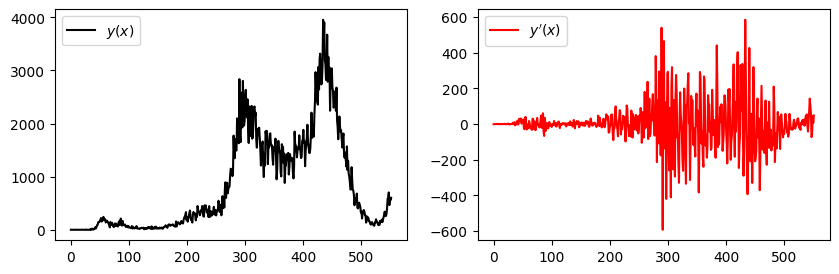

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,3)) 
ax[1].plot(x, dydx, 'r-', label='$y\'(x)$')
ax[0].plot(x, y, 'k-', label='$y(x)$')
[a.legend() for a in ax]

Smooth the data by convolving it with a rectangle

In [20]:
filt = np.ones(15)/15

In [21]:
filt

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [22]:
y_smooth = np.convolve(y, filt, mode='valid')       # essentially moving average        of 7 before and 7 after: big 15 points average
dysdx = np.gradient(y_smooth, x[7:-7])                    # start at 7th point and end at -7th point

Plot

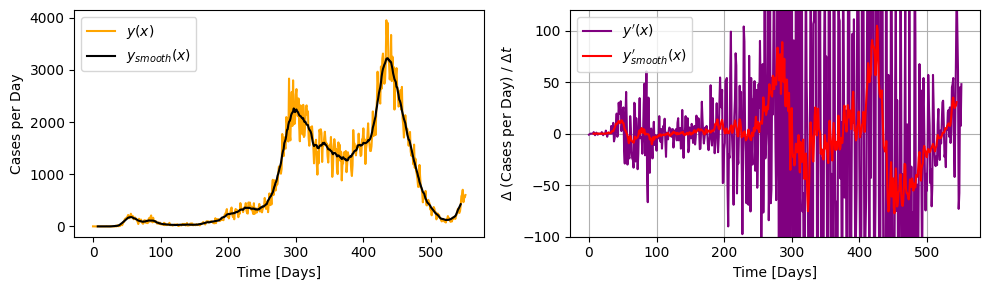

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,3)) 
ax[0].plot(x, y, '-', color='orange', label='$y(x)$')
ax[0].plot(x[7:-7], y_smooth, 'k-', label='$y_{smooth}(x)$')

ax[1].plot(x, dydx, '-', color='purple', label='$y\'(x)$')
ax[1].plot(x[7:-7], dysdx, 'r-', label='$y_{smooth}\'(x)$')
ax[1].set_ylim(-100, 120)
ax[1].grid()

[a.legend() for a in ax]
[a.set_xlabel('Time [Days]') for a in ax]
ax[0].set_ylabel('Cases per Day') 
ax[1].set_ylabel('$\Delta$ (Cases per Day) / $\Delta t$')
fig.tight_layout()
plt.show()

# Quasi-Symbolic Case

In this case you know your function $f(x) = ...$ but the function is not given by a typical expression. For example.

$$f(u) = \text{max} \left\{ \left|e^{-x_iu^2} - y_i\right| \right\}  $$

for some array of $x_i$'s and $y_i$'s

In [24]:
x = np.linspace(0, 1, 500)
y = np.exp(-x*2.15*2) + 0.1*np.random.randn(len(x))

Text(0, 0.5, '$y_i$')

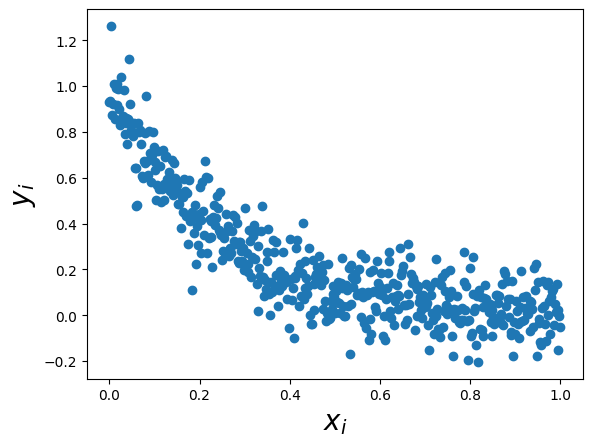

In [25]:
plt.scatter(x, y)
plt.xlabel('$x_i$', fontsize=20)
plt.ylabel('$y_i$', fontsize=20)

Define function

In [26]:
def f(u): 
    return max(np.abs(np.exp(-x*u**2) -y))

Compute the function values

In [27]:
u = np.linspace(0, 10, 40)
f_u = np.vectorize(f)(u)

In [ ]:
np.vectorize?

Plot

Text(0, 0.5, '$f(u)$')

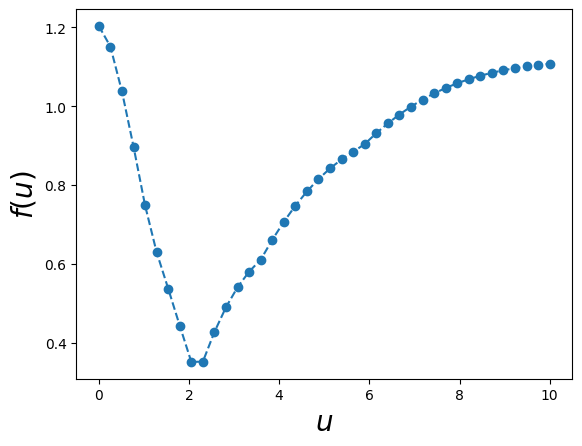

In [33]:
plt.plot(u, f_u, 'o--')
plt.xlabel('$u$', fontsize=20)
plt.ylabel('$f(u)$', fontsize=20)

You could always just take the derivative of the numerical array `f_u`, but there is a specific derivative function better assigned for this

In [37]:
derivative(f, 1, dx=1e-6)

C:\Users\sheuh\AppData\Local\Temp\ipykernel_10344\686856313.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, 1, dx=1e-6)


-0.5432658105597454

Compute derivative

In [38]:
dfdu = np.vectorize(derivative)(f, u, dx=1e-6)

Plot

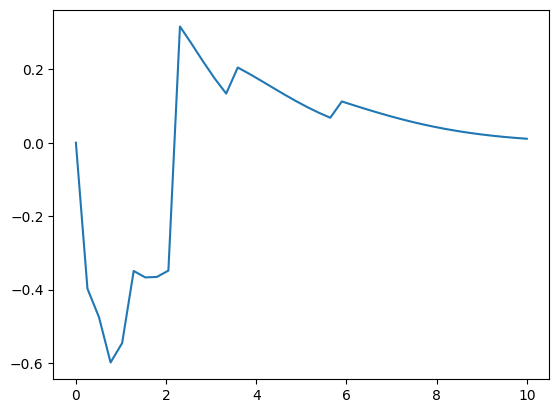

In [39]:
plt.plot(u, dfdu)